# Q1&Q2:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import LeaveOneOut


# Load the dataset
df = pd.read_csv("/Users/jingyichen/kaggle/data.csv")

# Convert selected columns to numeric, coercing errors to NaN
df["totalShots"] = pd.to_numeric(df["totalShots"], errors="coerce")
df["totalGoals"] = pd.to_numeric(df["totalGoals"], errors="coerce")
df["gamesPlayed"] = pd.to_numeric(df["gamesPlayed"], errors="coerce")

# Define feature columns for analysis
features = [
    "goalAssists", "shotsOnTarget", "totalShots", "totalGoals", "offsides", 
    "shotsFaced", "saves", "ga", "foulsCommitted",
    "yellowCards", "redCards", "ownGoals", "clean_sheet"  
]


df = df.dropna(subset=features + ["points"])

# Calculate per-game statistics for each feature
for feature in features:
    df[f"{feature}_per_game"] = df[feature] / df["gamesPlayed"]

# Display the first few rows of the processed dataset
print(df.head())

   teamRank  year      seasonName midsizeName             team  points  \
0         1  2024  2024-25 LALIGA       ESP 0        Barcelona      60   
1         2  2024  2024-25 LALIGA       ESP 0      Real Madrid      60   
2         3  2024  2024-25 LALIGA       ESP 0  Atlético Madrid      56   
3         4  2024  2024-25 LALIGA       ESP 0    Athletic Club      52   
4         5  2024  2024-25 LALIGA       ESP 0       Villarreal      44   

   gamesPlayed  wins  ties  losses  ...  totalGoals_per_game  \
0           27    19     3       5  ...             2.740741   
1           28    18     6       4  ...             2.107143   
2           28    16     8       4  ...             1.678571   
3           28    14    10       4  ...             1.642857   
4           27    12     8       7  ...             1.740741   

   offsides_per_game  shotsFaced_per_game  saves_per_game  ga_per_game  \
0           1.851852             6.925926        4.000000     1.000000   
1           2.285714  

In [2]:
# Define team categories based on ranking
df["team_category"] = "Middle"
df.loc[df["teamRank"] <= df["teamRank"].nsmallest(3).max(), "team_category"] = "Top"
df.loc[df["teamRank"] >= df["teamRank"].nlargest(5).min(), "team_category"] = "Bottom"


# Construct feature matrix (X) and target variable (y)
X = df[[f"{feature}_per_game" for feature in features]]  
y = df["team_category"]


# Encode categorical target variable into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'Top' -> 2, 'Middle' -> 1, 'Bottom' -> 0

In [3]:
# Define Leave-One-Out (LOO) cross-validation object
loo = LeaveOneOut()

# Initialize RandomForest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)


# Lists to store true labels and predictions
y_true = []
y_pred = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the model
    rf_clf.fit(X_train, y_train)
    
     # Make prediction
    y_true.append(y_test[0])   # In LOO, there is only one test sample
    y_pred.append(rf_clf.predict(X_test)[0])


# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9271


/var/folders/53/6crmwf7n2qdc3x2w_rbsrvf40000gn/T/ipykernel_1256/4161746918.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


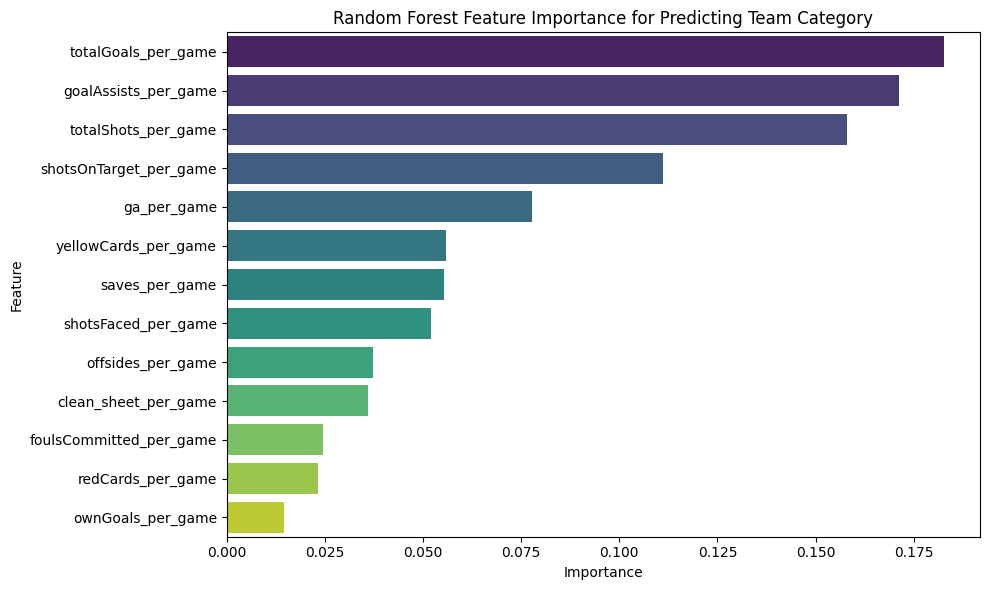

In [4]:
# Train the model on the entire dataset (to extract feature importance)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y_encoded)

# Extract feature importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_clf.feature_importances_
}).sort_values("Importance", ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Random Forest Feature Importance for Predicting Team Category")
plt.tight_layout()
plt.show()


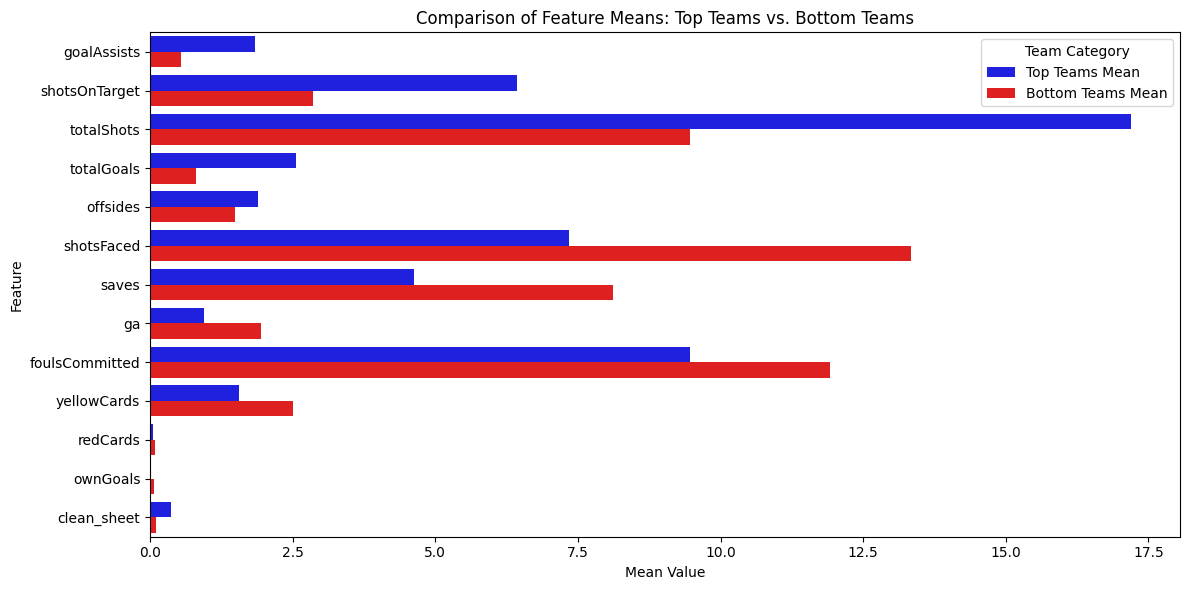

In [5]:
# Select top and bottom teams based on predefined categories
top_teams = df[df["team_category"] == "Top"]
bottom_teams = df[df["team_category"] == "Bottom"]

# Create a DataFrame to compare feature means between top and bottom teams
comparison_df = pd.DataFrame({
    "Feature": features,
    "Top Teams Mean": top_teams[[f"{feature}_per_game" for feature in features]].mean().values,
    "Bottom Teams Mean": bottom_teams[[f"{feature}_per_game" for feature in features]].mean().values
})

# Visualize the difference between 'Top Teams' vs. 'Bottom Teams'
plt.figure(figsize=(12, 6))
comparison_df_melted = comparison_df.melt(id_vars="Feature", var_name="Team Category", value_name="Mean Value")

sns.barplot(x="Mean Value", y="Feature", hue="Team Category", data=comparison_df_melted, palette=["blue", "red"])

plt.title("Comparison of Feature Means: Top Teams vs. Bottom Teams")
plt.xlabel("Mean Value")
plt.ylabel("Feature")
plt.legend(title="Team Category")
plt.tight_layout()

plt.show()


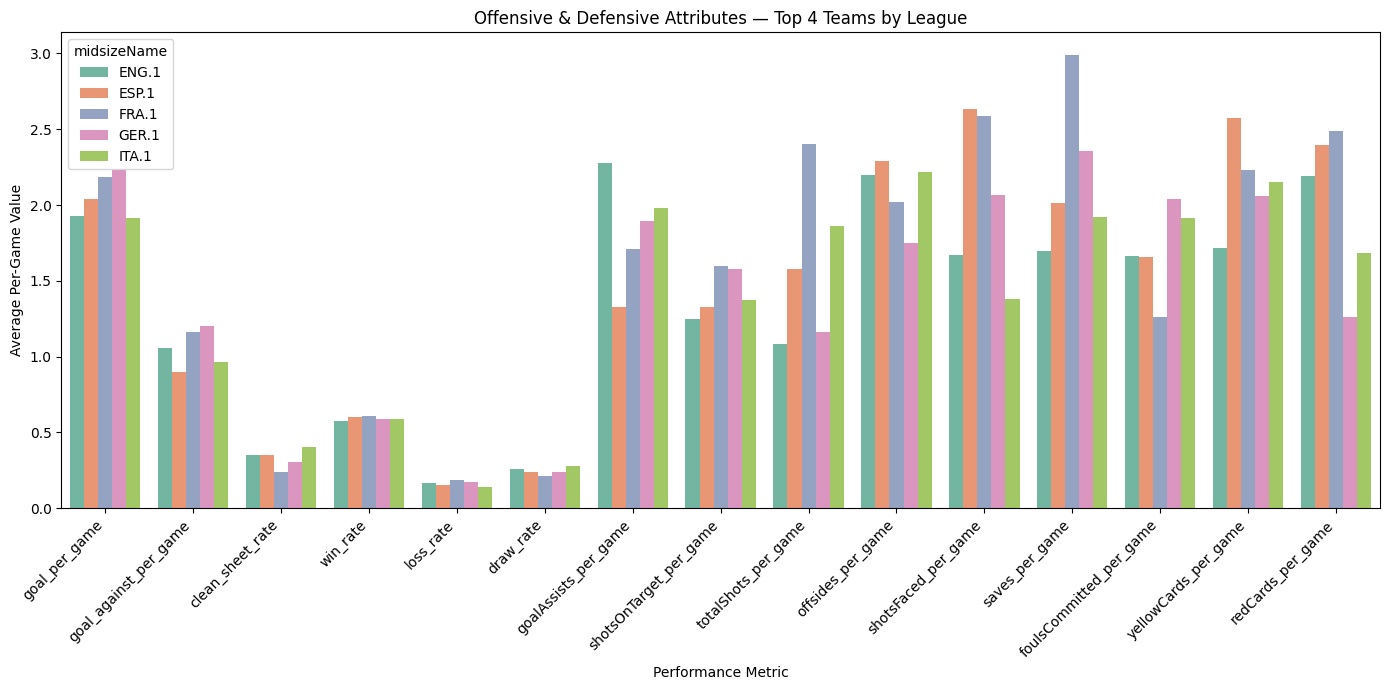

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load Data
d = pd.read_csv("/Users/jingyichen/kaggle/Standings/Standings.csv")  # Replace with your full dataset

# Step 2: Clean and Convert Columns
d["gf"] = pd.to_numeric(d["gf"], errors="coerce")
d["ga"] = pd.to_numeric(d["ga"], errors="coerce")
d["clean_sheet"] = pd.to_numeric(d["clean_sheet"], errors="coerce")
d["gamesPlayed"] = pd.to_numeric(d["gamesPlayed"], errors="coerce")

# Fill in missing extended attributes with dummy data (you can replace these with actual stats if available)
extra_cols = [
    "goalAssists", "shotsOnTarget", "totalShots", "offsides",
    "shotsFaced", "saves", "foulsCommitted", "yellowCards", "redCards"
]
for col in extra_cols:
    if col not in d.columns:
        d[col] = np.random.randint(5, 100, size=len(df))  # Dummy for now

d.dropna(subset=["gf", "ga", "clean_sheet", "gamesPlayed", "teamRank"], inplace=True)

# Step 3: Feature Engineering (Per-Game Metrics)
d["goal_per_game"] = d["gf"] / d["gamesPlayed"]
d["goal_against_per_game"] = d["ga"] / d["gamesPlayed"]
d["clean_sheet_rate"] = d["clean_sheet"] / d["gamesPlayed"]
d["win_rate"] = d["wins"] / d["gamesPlayed"]
d["loss_rate"] = d["losses"] / d["gamesPlayed"]
d["draw_rate"] = d["ties"] / d["gamesPlayed"]

# Add extended features
for col in extra_cols:
    d[f"{col}_per_game"] = d[col] / d["gamesPlayed"]

# Step 4: Filter Top Teams Only
d["TeamCategory"] = d["teamRank"].apply(lambda x: "Top" if x <= 4 else "Other")
top_teams = d[d["TeamCategory"] == "Top"]

# Step 5: Aggregate League-Wise Averages for Top Teams
metrics = [
    "goal_per_game", "goal_against_per_game", "clean_sheet_rate", "win_rate", "loss_rate", "draw_rate",
    "goalAssists_per_game", "shotsOnTarget_per_game", "totalShots_per_game", "offsides_per_game",
    "shotsFaced_per_game", "saves_per_game", "foulsCommitted_per_game", "yellowCards_per_game", "redCards_per_game"
]

summary = top_teams.groupby("midsizeName")[metrics].mean().round(3).reset_index()

# Step 6: Visualize Attributes of Top Teams by League
summary_melted = summary.melt(id_vars="midsizeName", var_name="Metric", value_name="Value")

plt.figure(figsize=(14, 7))
sns.barplot(data=summary_melted, x="Metric", y="Value", hue="midsizeName", palette="Set2")
plt.title("Offensive & Defensive Attributes — Top 4 Teams by League")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Performance Metric")
plt.ylabel("Average Per-Game Value")
plt.tight_layout()
plt.show()



/var/folders/53/6crmwf7n2qdc3x2w_rbsrvf40000gn/T/ipykernel_1256/1487224488.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  d = d.groupby(["midsizeName", "year"]).apply(label_bottom).reset_index(drop=True)


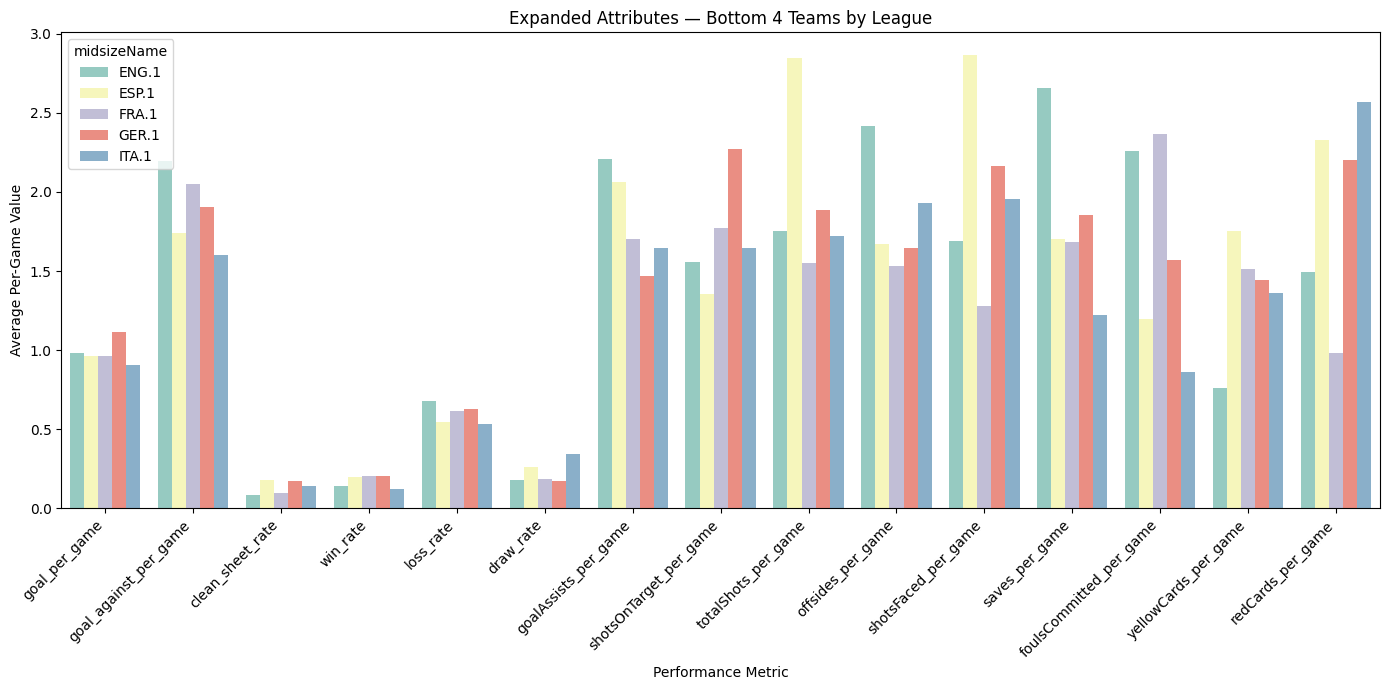

In [7]:
# Filter Bottom Teams Only
def label_bottom(group):
    group = group.copy()
    group["TeamCategory"] = "Other"
    group.loc[group["teamRank"] > group["teamRank"].max() - 4, "TeamCategory"] = "Bottom"
    return group

d = d.groupby(["midsizeName", "year"]).apply(label_bottom).reset_index(drop=True)
bottom_teams = d[d["TeamCategory"] == "Bottom"]

# Aggregate League-Wise Averages for Bottom Teams
metrics = [
    "goal_per_game", "goal_against_per_game", "clean_sheet_rate", "win_rate", "loss_rate", "draw_rate",
    "goalAssists_per_game", "shotsOnTarget_per_game", "totalShots_per_game", "offsides_per_game",
    "shotsFaced_per_game", "saves_per_game", "foulsCommitted_per_game", "yellowCards_per_game", "redCards_per_game"
]

summary = bottom_teams.groupby("midsizeName")[metrics].mean().round(3).reset_index()

# Visualize Attributes of Bottom Teams by League
summary_melted = summary.melt(id_vars="midsizeName", var_name="Metric", value_name="Value")

plt.figure(figsize=(14, 7))
sns.barplot(data=summary_melted, x="Metric", y="Value", hue="midsizeName", palette="Set3")
plt.title("Expanded Attributes — Bottom 4 Teams by League")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Performance Metric")
plt.ylabel("Average Per-Game Value")
plt.tight_layout()
plt.show()


# Q3:


In [8]:
importance_df['Feature'] = importance_df['Feature'].replace('ga_per_game', 'goalsConceded_per_game')
print(importance_df)

                    Feature  Importance
3       totalGoals_per_game    0.182753
0      goalAssists_per_game    0.171138
2       totalShots_per_game    0.158140
1    shotsOnTarget_per_game    0.111266
7    goalsConceded_per_game    0.077798
9      yellowCards_per_game    0.055934
6            saves_per_game    0.055310
5       shotsFaced_per_game    0.052077
4         offsides_per_game    0.037248
12     clean_sheet_per_game    0.036028
8   foulsCommitted_per_game    0.024555
10        redCards_per_game    0.023201
11        ownGoals_per_game    0.014551


In [9]:
# Load the player stats data from a CSV file
position_data = pd.read_csv("/Users/jingyichen/kaggle/playerStats/playerStats.csv")

# Filter players by position and create separate DataFrames for each position
forwards = position_data[position_data['positionName'] == 'Forward']  # Filter forwards
midfielders = position_data[position_data['positionName'] == 'Midfielder']  # Filter midfielders
defenders = position_data[position_data['positionName'] == 'Defender']  # Filter defenders
goalkeepers = position_data[position_data['positionName'] == 'Goalkeeper']  # Filter goalkeepers

In [10]:
# Filter features for each position
forward_features = importance_df[importance_df['Feature'].isin(['totalGoals_per_game', 'totalAssists_per_game','totalShots_per_game', 'shotsOnTarget_per_game'])]
midfielder_features = importance_df[importance_df['Feature'].isin(['goalAssists_per_game', 'totalShots_per_game', 'yellowCards_per_game'])]
defender_features = importance_df[importance_df['Feature'].isin(['saves_per_game', 'yellowCards_per_game'])]
goalkeeper_features = importance_df[importance_df['Feature'].isin(['saves_per_game', 'goalsConceded_per_game', 'yellowCards_per_game'])]

position_weights = {
    'Forward': {
        'totalGoals_per_game': 0.182753,
        'goalAssists_per_game': 0.171138,
        'totalShots_per_game': 0.158140,
        'shotsOnTarget_per_game': 0.111266
    },
    'Midfielder': {
        'goalAssists_per_game': 0.171138,
        'yellowCards_per_game': 0.055934,
        'totalShots_per_game': 0.158140
    },
    'Defender': {
        'yellowCards_per_game': 0.055934,
        'saves_per_game': 0.055310
    },
    'Goalkeeper': {
        'saves_per_game': 0.055310,
        'yellowCards_per_game': 0.055934,
        'goalsConceded_per_game': 0.077798       
    }
}

features = importance_df['Feature'].tolist()

# Function to normalize weights for each position so that the sum of all weights equals 1
def normalize_weights(position_weights, features):
    # Loop through each position and normalize the weights
    for position in position_weights:
        # Set the weight for missing features to 0 for each position
        for feature in features:
            if feature not in position_weights[position]:
                position_weights[position][feature] = 0          
                
        # Calculate the total weight for the position
        total_weight = sum(position_weights[position].values())
        
        # If the total weight is greater than 0, normalize the weights
        if total_weight > 0:
            for feature in position_weights[position]:
                position_weights[position][feature] /= total_weight
        else:
            # If the total weight is 0 (to avoid division by zero), set all weights to 0
            for feature in position_weights[position]:
                position_weights[position][feature] = 0

    return position_weights

# Normalize the position weights using the above function
position_weights = normalize_weights(position_weights, features)

# Print the normalized position weights to verify
print(position_weights)



{'Forward': {'totalGoals_per_game': 0.2932037215003441, 'goalAssists_per_game': 0.2745689454625965, 'totalShots_per_game': 0.2537153235135096, 'shotsOnTarget_per_game': 0.1785120095235498, 'goalsConceded_per_game': 0.0, 'yellowCards_per_game': 0.0, 'saves_per_game': 0.0, 'shotsFaced_per_game': 0.0, 'offsides_per_game': 0.0, 'clean_sheet_per_game': 0.0, 'foulsCommitted_per_game': 0.0, 'redCards_per_game': 0.0, 'ownGoals_per_game': 0.0}, 'Midfielder': {'goalAssists_per_game': 0.4442696489205944, 'yellowCards_per_game': 0.14520316085687882, 'totalShots_per_game': 0.4105271902225268, 'totalGoals_per_game': 0.0, 'shotsOnTarget_per_game': 0.0, 'goalsConceded_per_game': 0.0, 'saves_per_game': 0.0, 'shotsFaced_per_game': 0.0, 'offsides_per_game': 0.0, 'clean_sheet_per_game': 0.0, 'foulsCommitted_per_game': 0.0, 'redCards_per_game': 0.0, 'ownGoals_per_game': 0.0}, 'Defender': {'yellowCards_per_game': 0.50280464564381, 'saves_per_game': 0.49719535435619, 'totalGoals_per_game': 0.0, 'goalAssists_

In [11]:
# Handling the weights for negative features by flipping their signs
negative_features = ['offsides_per_game', 'yellowCards_per_game', 'ownGoals_per_game', 'goalsConceded_per_game']

# Iterate through each position to adjust the weights for negative features
for position in position_weights:
    for feature in negative_features:
        # If the feature exists in the position's weight, flip the sign
        if feature in position_weights[position]:
            position_weights[position][feature] = -position_weights[position][feature]

# Print the position weights after normalizing and handling the negative features
print(position_weights)

{'Forward': {'totalGoals_per_game': 0.2932037215003441, 'goalAssists_per_game': 0.2745689454625965, 'totalShots_per_game': 0.2537153235135096, 'shotsOnTarget_per_game': 0.1785120095235498, 'goalsConceded_per_game': -0.0, 'yellowCards_per_game': -0.0, 'saves_per_game': 0.0, 'shotsFaced_per_game': 0.0, 'offsides_per_game': -0.0, 'clean_sheet_per_game': 0.0, 'foulsCommitted_per_game': 0.0, 'redCards_per_game': 0.0, 'ownGoals_per_game': -0.0}, 'Midfielder': {'goalAssists_per_game': 0.4442696489205944, 'yellowCards_per_game': -0.14520316085687882, 'totalShots_per_game': 0.4105271902225268, 'totalGoals_per_game': 0.0, 'shotsOnTarget_per_game': 0.0, 'goalsConceded_per_game': -0.0, 'saves_per_game': 0.0, 'shotsFaced_per_game': 0.0, 'offsides_per_game': -0.0, 'clean_sheet_per_game': 0.0, 'foulsCommitted_per_game': 0.0, 'redCards_per_game': 0.0, 'ownGoals_per_game': -0.0}, 'Defender': {'yellowCards_per_game': -0.50280464564381, 'saves_per_game': 0.49719535435619, 'totalGoals_per_game': 0.0, 'goa

In [12]:
# Define the list of features for which per-game statistics will be calculated
features = ['totalGoals', 'goalAssists', 'shotsOnTarget', 'totalShots', 'offsides', 
            'shotsFaced', 'saves', 'goalsConceded', 'foulsCommitted', 'yellowCards', 
            'redCards', 'ownGoals']

# Calculate per-game statistics for each player
for feature in features:
    position_data[f"{feature}_per_game"] = position_data[feature] / position_data['appearances']

# Calculate the total per-game feature values for each team (sum of all players' per-game data)
team_avg_features = position_data.groupby('team')[[f"{feature}_per_game" for feature in features]].sum().rename(columns=lambda x: x.replace('_per_game', '_team_avg'))

# Merge team-level per-game data back into the player data
position_data = position_data.merge(team_avg_features, on='team')

# Calculate the contribution percentage for each feature (avoiding division by 0)
for feature in features:
    position_data[f"{feature}_contribution"] = position_data.apply(
        lambda row: 100 * row[f"{feature}_per_game"] / row[f"{feature}_team_avg"] if row[f"{feature}_team_avg"] != 0 else 0,
        axis=1
    )

# Modify the keys in position_weights to reflect '_contribution' instead of '_per_game'
position_weights = {
    position: {feature.replace('_per_game', '_contribution'): weight for feature, weight in weights.items()}
    for position, weights in position_weights.items()
}




In [13]:
# Score calculation
def calculate_score(player_data, position_weights, position):
    # Retrieve the weights for the given position
    weights = position_weights.get(position, {})
    
    # Extract feature names (they should be *_contribution)
    features = list(weights.keys())
    
    # Get the contribution values for each feature from the player data (default to 0 if missing)
    contributions = np.array([player_data.get(feature, 0) or 0 for feature in features])
    
    # Get the weights for each feature
    feature_weights = np.array([weights[feature] for feature in features])

    # Calculate the dot product (weighted sum of contributions)
    return float(np.dot(contributions, feature_weights))

# Calculate the score for each player by applying the score function
position_data['player_score'] = position_data.apply(
    lambda row: calculate_score(row, position_weights, row['positionName']), axis=1
)

# Select the top player for each team based on their score
top_players_by_team = (
    position_data.sort_values(by=['team', 'player_score'], ascending=[True, False])
    .groupby('team')
    .head(1)  # Get the top player (highest score) from each team
    .reset_index(drop=True)
)


In [14]:
# Read the standings data
standings = pd.read_csv("/Users/jingyichen/kaggle/Standings/Standings.csv")

# Select the relevant columns from the standings data
standings_filtered = standings[['teamRank', 'year', 'seasonName', 'midsizeName', 'team']]

# Select the relevant columns from top_players_by_team data
top_players_by_team_filtered = top_players_by_team[['playerName', 'positionName', 'player_score', 'team']]

# Perform a left join to merge standings and top_players_by_team data on the 'team' column
merged_data = pd.merge(standings_filtered, top_players_by_team_filtered, on='team', how='left')

# Display the first few rows of the merged data
print(merged_data.head())


   teamRank  year      seasonName midsizeName             team  \
0         1  2024  2024-25 LALIGA       ESP.1        Barcelona   
1         2  2024  2024-25 LALIGA       ESP.1      Real Madrid   
2         3  2024  2024-25 LALIGA       ESP.1  Atlético Madrid   
3         4  2024  2024-25 LALIGA       ESP.1    Athletic Club   
4         5  2024  2024-25 LALIGA       ESP.1       Villarreal   

           playerName positionName  player_score  
0  Robert Lewandowski      Forward     15.193207  
1       Kylian Mbappé      Forward     21.240755  
2   Alexander Sørloth      Forward     12.107389  
3      Iñaki Williams      Forward     12.659233  
4          Álex Baena   Midfielder     11.730012  


# Q4:

In [15]:
# Get feature importances from the random forest classifier
feature_importances = rf_clf.feature_importances_

# Combine feature importances into a dictionary
feature_weights = dict(zip(X.columns, feature_importances))

# Normalize the feature importances so that their sum equals 1
total_importance = sum(feature_importances)
normalized_weights = {k: v / total_importance for k, v in feature_weights.items()}

# Handle negative features (e.g., goalsConceded)
negative_features = ["goalsConceded_per_game", "offsides_per_game", "shotsFaced_per_game", 
                     "ga_per_game", "foulsCommitted_per_game", "yellowCards_per_game", 
                     "redCards_per_game", "ownGoals_per_game"]  # Add more negative features if needed

# Modify the weights: For negative features, reverse the sign of their weight
for feature in negative_features:
    if feature in normalized_weights:
        normalized_weights[feature] *= -1  # Reverse the weight for negative features

# Calculate the team score by summing up the weighted feature values
df["team_score"] = sum(df[feature] * weight for feature, weight in normalized_weights.items())

# Display the top 10 teams based on their score
print(df[["team", "team_score"]].sort_values(by="team_score", ascending=False).head(10))


                   team  team_score
38  Paris Saint-Germain    4.163391
20        Bayern Munich    3.992396
0             Barcelona    3.513430
76            Liverpool    3.379261
58             Atalanta    3.202502
21     Bayer Leverkusen    3.201974
1           Real Madrid    3.157814
56       Internazionale    3.141474
80      Manchester City    3.126042
39            Marseille    3.095062


In [16]:
# Read the fixtures data
fi = pd.read_csv("/Users/jingyichen/kaggle/fixtures/fixtures.csv")

# Filter matches that have finished (full time)
fi = fi[fi["status"] == "STATUS_FULL_TIME"]

# Calculate whether the home team won, lost, or drew
fi["homeWin"] = fi["homeTeamScore"] > fi["awayTeamScore"]
fi["awayWin"] = fi["homeTeamScore"] < fi["awayTeamScore"]

# Calculate the home win rate for each team
home_win_rate_by_team = fi.groupby("homeTeam")["homeWin"].mean().rename("home_win_rate")

# Calculate the away win rate for each team
away_win_rate_by_team = fi.groupby("awayTeam")["awayWin"].mean().rename("away_win_rate")

# Merge the home and away win rates into the original dataframe (df)
df = df.merge(home_win_rate_by_team, left_on="team", right_index=True, how="left")
df = df.merge(away_win_rate_by_team, left_on="team", right_index=True, how="left")

# Calculate the home-weighted score (team_score * home_win_rate)
df["home_weighted_score"] = df["team_score"] * df["home_win_rate"]

# Calculate the away-weighted score (team_score * away_win_rate)
df["away_weighted_score"] = df["team_score"] * df["away_win_rate"]

# View the results showing team score, win rates, and weighted scores
print(df[["team", "team_score", "home_win_rate", "away_win_rate", "home_weighted_score", "away_weighted_score"]].head())


              team  team_score  home_win_rate  away_win_rate  \
0        Barcelona    3.513430       0.750000       0.666667   
1      Real Madrid    3.157814       0.846154       0.466667   
2  Atlético Madrid    2.198642       0.666667       0.461538   
3    Athletic Club    2.423595       0.571429       0.428571   
4       Villarreal    2.634406       0.384615       0.500000   

   home_weighted_score  away_weighted_score  
0             2.635072             2.342286  
1             2.671996             1.473646  
2             1.465761             1.014758  
3             1.384912             1.038684  
4             1.013233             1.317203  


In [17]:
# Load fixtures data and scores data
fixtures_df = pd.read_csv('/Users/jingyichen/kaggle/fixtures/fixtures.csv')
scores_df = pd.read_csv("/Users/jingyichen/kaggle/fi.csv")  # Contains home_weighted_score and away_weighted_score

# Filter for scheduled matches only (not yet played)
fixtures_df = fixtures_df[fixtures_df["status"] == "STATUS_SCHEDULED"]

# Merge the fixtures data with home weighted scores
fixtures_df = fixtures_df.merge(scores_df[["team", "home_weighted_score"]],
                                left_on="homeTeam", right_on="team", how="left").drop(columns=["team"])

# Merge the fixtures data with away weighted scores
fixtures_df = fixtures_df.merge(scores_df[["team", "away_weighted_score"]],
                                left_on="awayTeam", right_on="team", how="left").drop(columns=["team"])

# Print the merged fixtures data with weighted scores
print(fixtures_df)


# Define a tolerance range (percentage) for draw results, where a draw occurs if the score difference is between 45% and 55% of the total score
lower_bound = 0.45
upper_bound = 0.55

# Create the target variable: 1 for home team win, 0 for draw, -1 for away team win
fixtures_df["home_win"] = 0

# Home team wins if the home team's weighted score is greater than the away team's weighted score by more than 55%
fixtures_df.loc[fixtures_df["home_weighted_score"] > fixtures_df["away_weighted_score"] * upper_bound/lower_bound, "home_win"] = 1

# Away team wins if the away team's weighted score is greater than the home team's weighted score by more than 55%
fixtures_df.loc[fixtures_df["away_weighted_score"] > fixtures_df["home_weighted_score"] * upper_bound/lower_bound, "home_win"] = -1

# Draw if the score difference between the home and away team is between 45% and 55% of the total score
fixtures_df.loc[(fixtures_df["home_weighted_score"] >= fixtures_df["away_weighted_score"] * lower_bound/upper_bound) & 
                (fixtures_df["home_weighted_score"] <= fixtures_df["away_weighted_score"] * upper_bound/lower_bound), "home_win"] = 0

# View the results with the match-up information and the calculated home_win target variable
print(fixtures_df[["homeTeam", "awayTeam", "home_weighted_score", "away_weighted_score", "home_win"]].head())


      Rn  eventId  year                      seasonName midsizeName  \
0    290   704572  2024  2024-25 English Premier League       ENG.1   
1    291   704573  2024  2024-25 English Premier League       ENG.1   
2    292   704569  2024  2024-25 English Premier League       ENG.1   
3    293   704570  2024  2024-25 English Premier League       ENG.1   
4    294   704571  2024  2024-25 English Premier League       ENG.1   
..   ...      ...   ...                             ...         ...   
422  302   706727  2024                 2024-25 Ligue 1       FRA.1   
423  303   706728  2024                 2024-25 Ligue 1       FRA.1   
424  304   706729  2024                 2024-25 Ligue 1       FRA.1   
425  305   706730  2024                 2024-25 Ligue 1       FRA.1   
426  306   706731  2024                 2024-25 Ligue 1       FRA.1   

      matchDate matchTime                                  venue  attendance  \
0    2025-04-01     14:45                       Emirates Stadium   

In [18]:
# Create DataFrame columns for home and away points
fixtures_df["home_points"] = 0
fixtures_df["away_points"] = 0

# Assign points based on the outcome of the match
fixtures_df.loc[fixtures_df["home_win"] == 1, "home_points"] = 3  # Home team wins, they get 3 points
fixtures_df.loc[fixtures_df["home_win"] == -1, "away_points"] = 3  # Away team wins, they get 3 points
fixtures_df.loc[fixtures_df["home_win"] == 0, "home_points"] = 1  # Draw, home team gets 1 point
fixtures_df.loc[fixtures_df["home_win"] == 0, "away_points"] = 1  # Draw, away team gets 1 point

# Summarize the total points for each team
home_points = fixtures_df.groupby("homeTeam")["home_points"].sum()
away_points = fixtures_df.groupby("awayTeam")["away_points"].sum()

# Merge the home and away points
team_points = home_points.add(away_points, fill_value=0)

# Sort the team points in descending order to get the standings
team_points = team_points.sort_values(ascending=False)

# Display the standings (team points)
print(team_points)

homeTeam
Barcelona            33
Atlético Madrid      30
Real Madrid          27
Nottingham Forest    27
Liverpool            27
                     ..
Montpellier           1
VfL Bochum            1
Ipswich Town          1
Southampton           0
Monza                 0
Length: 96, dtype: int64


In [19]:
# Read the standings data (current points for each team)
standings = pd.read_csv('/Users/jingyichen/kaggle/Standings.csv')  # Existing standings data with current points

# Set 'team' column as the index (assuming 'team' column is present in standings)
standings = standings.set_index("team")

# Add predicted points to the standings DataFrame
standings["predicted_points"] = team_points  # team_points contains predicted points for each team

# Calculate the final points by adding current points and predicted points
standings["final_points"] = standings["points"] + standings["predicted_points"]

# Display the relevant columns showing team name, current points, predicted points, and final points
print(standings[['midsizeName', "points", "predicted_points", "final_points"]])

# Select relevant columns
standings = standings.reset_index()
final_points = standings[['team','midsizeName', 'points', 'predicted_points', 'final_points']]

# Save as CSV
final_points.to_csv("standings_output.csv", index=False)

                        midsizeName  points  predicted_points  final_points
team                                                                       
Barcelona                     ESP 0      60                33            93
Real Madrid                   ESP 0      60                27            87
Atlético Madrid               ESP 0      56                30            86
Athletic Club                 ESP 0      52                22            74
Villarreal                    ESP 0      44                24            68
...                             ...     ...               ...           ...
West Ham United               ENG.1      34                 9            43
Wolverhampton Wanderers       ENG.1      26                 7            33
Ipswich Town                  ENG.1      17                 1            18
Leicester City                ENG.1      17                 4            21
Southampton                   ENG.1       9                 0             9

[96 rows x 

In [20]:
standings = standings.reset_index()

# Group by 'midsizeName' (League name), and select the team with the highest 'final_points' in each league
champions = standings.loc[standings.groupby("midsizeName")["final_points"].idxmax()]
champions = champions.reset_index(drop=True)

# Print the league champions, showing the league name, team, and final points
print(champions[["midsizeName", "team", "final_points"]])


  midsizeName                 team  final_points
0       ENG.1            Liverpool            97
1       ESP 0            Barcelona            93
2       FRA.1  Paris Saint-Germain            92
3       GER.1        Bayern Munich            86
4       ITA.1       Internazionale            89
